In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


         Time  Temperature_dc  Dew_Point_dc  Humidity_pr  Wind_Speed_kph  \
0  01/01/2016              28             7           32               7   
1  02/01/2016              28             8           35               5   
2  03/01/2016              28             6           32               4   
3  04/01/2016              25             9           41               6   
4  05/01/2016              27             9           39               6   

   Pressure_hg  Season  Heatstroke_cases  
0        30.03  Winter                 0  
1        30.06  Winter                 0  
2        30.00  Winter                 0  
3        29.94  Winter                 0  
4        29.97  Winter                 0  
Time                0
Temperature_dc      0
Dew_Point_dc        0
Humidity_pr         0
Wind_Speed_kph      0
Pressure_hg         0
Season              0
Heatstroke_cases    0
dtype: int64


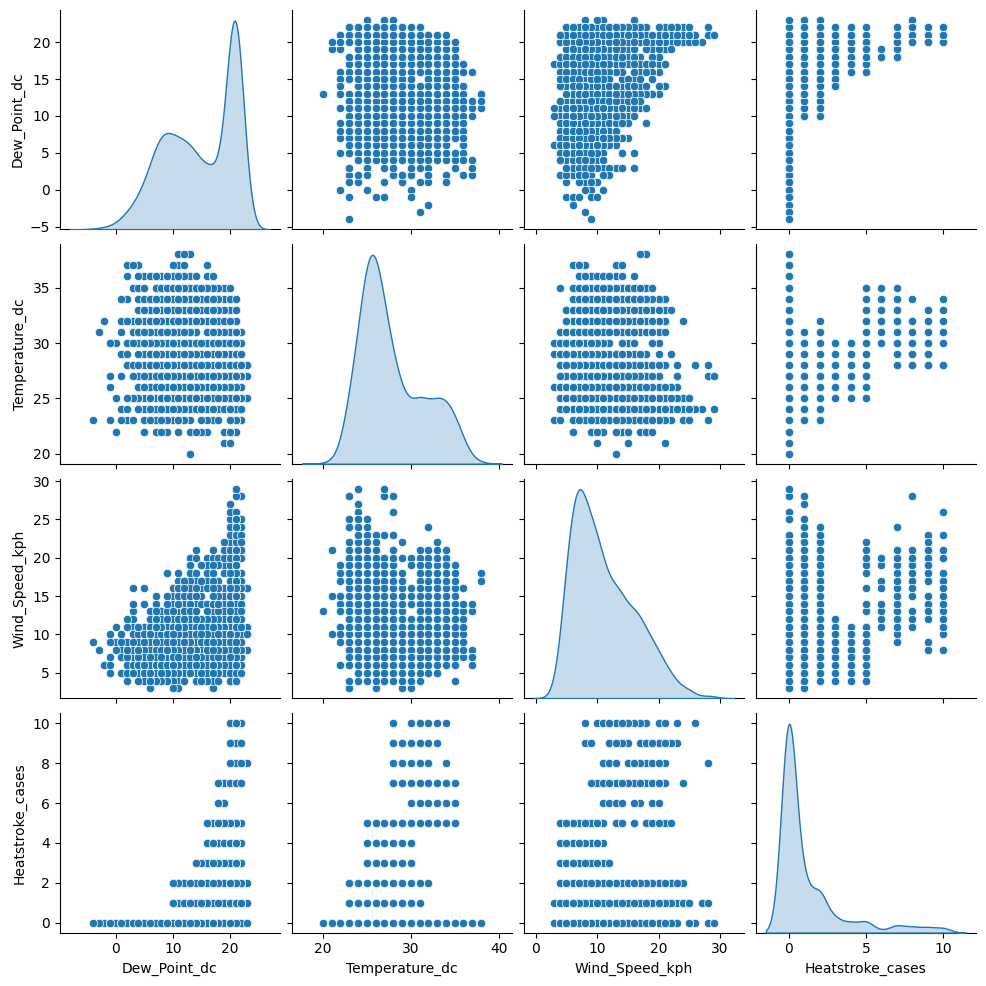

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/data_with_heatstroke_cases (2).csv')


print(data.head())


print(data.isnull().sum())


sns.pairplot(data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph', 'Heatstroke_cases']], diag_kind='kde')
plt.show()


scaler = StandardScaler()
data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']] = scaler.fit_transform(data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']])


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']]
y = data['Heatstroke_cases']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')


catboost_regressor.fit(X_train, y_train, verbose=100)


y_pred = catboost_regressor.predict(X_test)


0:	learn: 2.0686315	total: 57.4ms	remaining: 57.4s
100:	learn: 0.8424199	total: 159ms	remaining: 1.41s
200:	learn: 0.7911543	total: 199ms	remaining: 792ms
300:	learn: 0.7521250	total: 265ms	remaining: 615ms
400:	learn: 0.7268168	total: 305ms	remaining: 456ms
500:	learn: 0.7068193	total: 347ms	remaining: 345ms
600:	learn: 0.6925627	total: 391ms	remaining: 259ms
700:	learn: 0.6764972	total: 431ms	remaining: 184ms
800:	learn: 0.6645177	total: 477ms	remaining: 118ms
900:	learn: 0.6547940	total: 520ms	remaining: 57.1ms
999:	learn: 0.6436483	total: 579ms	remaining: 0us


Mean Squared Error: 0.8363174501764217
Mean Absolute Error: 0.5952573495711253
R^2 Score: 0.8373419888831006


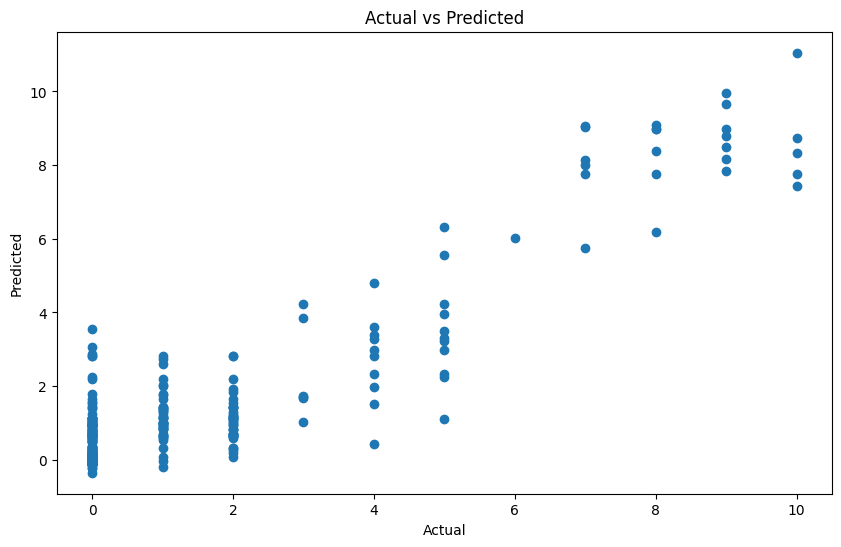

In [ ]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


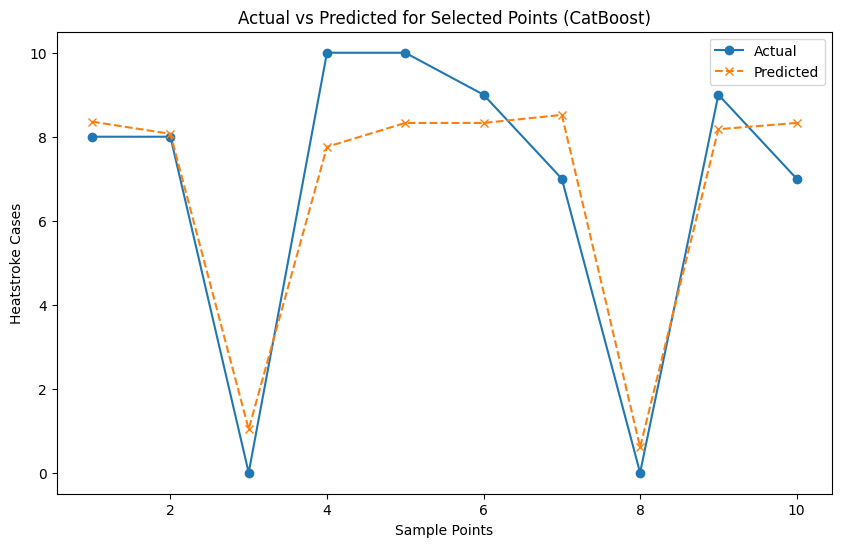

In [ ]:

sample_points = data.iloc[160:170]


y_pred_sample = catboost_regressor.predict(sample_points[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']])


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sample_points['Heatstroke_cases'], marker='o', label='Actual')
plt.plot(range(1, 11), y_pred_sample, marker='x', linestyle='--', label='Predicted')
plt.xlabel("Sample Points")
plt.ylabel("Heatstroke Cases")
plt.title("Actual vs Predicted for Selected Points (CatBoost)")
plt.legend()
plt.show()


In [ ]:

accuracy_catboost = catboost_regressor.score(X_test, y_test) * 100
print("Accuracy (CatBoost): {:.2f}%".format(accuracy_catboost))


Accuracy (CatBoost): 83.73%


In [ ]:

rmse_catboost = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE (CatBoost): {:.2f}".format(rmse_catboost))


RMSE (CatBoost): 0.91


In [ ]:
!pip install joblib


In [ ]:
import joblib


joblib.dump(catboost_regressor, 'catboost_model.joblib')


['catboost_model.joblib']

In [ ]:
import os


print(os.listdir('/content'))


['.config', 'catboost_model.joblib', 'catboost_info', 'drive', 'data_with_heatstroke_cases (2).csv', 'sample_data']
